In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df1 =pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df2= pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
submission =pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

## Copy the dataframe into another variable

In [4]:
train_df = df1.copy()
test_df =df2.copy()

### Preview the test and train

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


### Data Wrangling of the train dataframe

In [8]:
train_df.shape

(1460, 81)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [11]:
#check for null values
train_df.isnull().sum().sort_values()

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
FireplaceQu       690
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
Length: 81, dtype: int64

In [12]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


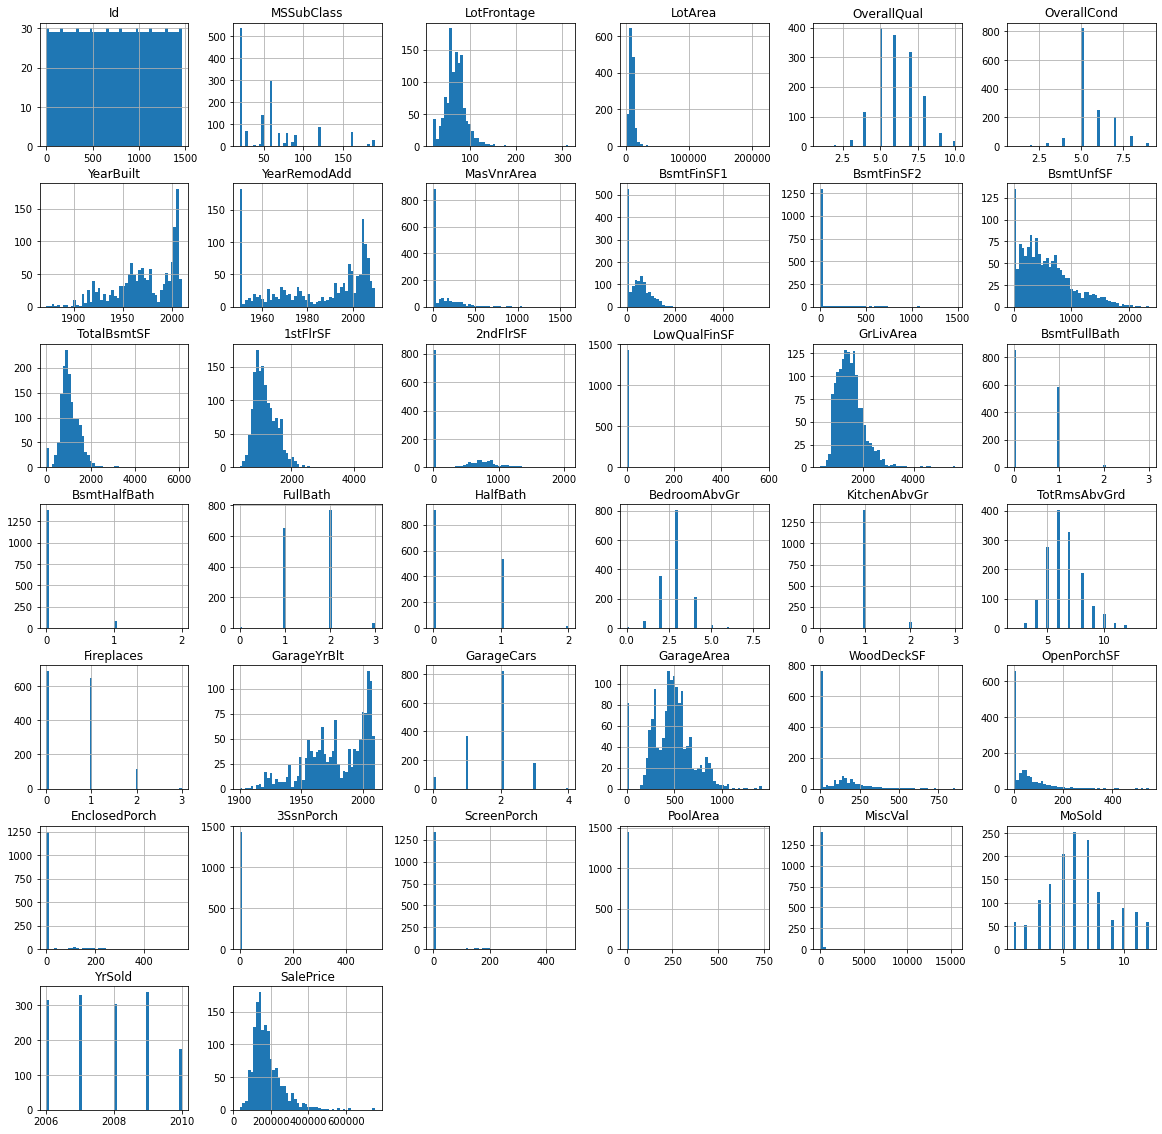

In [13]:
#histogram to preview the type of distribution
train_df.hist(bins=50, figsize=(20,20))
plt.show()

In [14]:
#Determine the correlation btween
train_df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### Remove columns that have less 

In [15]:
train_df =train_df.drop(['Alley','Fence','MiscFeature','PoolQC'],axis=1)

In [16]:
train_df.shape

(1460, 77)

### Fill missing values of columns with null values

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
train_df.isnull().sum().sort_values(ascending=False)

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
MSSubClass        0
HeatingQC         0
SalePrice         0
Length: 77, dtype: int64

In [19]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].median())
train_df['LotFrontage'].isnull().sum()

0

In [20]:
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median())
train_df['GarageYrBlt'].isnull().sum()

0

#### Fill the non-numeric column datatype that have null values with the mode of the columns

In [21]:
train_df.isnull().sum()[train_df.isnull().sum()>0]

MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [22]:
train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0],inplace=True)
train_df['MasVnrType'].isnull().sum()

0

In [23]:
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mode()[0],inplace=True)
train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0],inplace=True)
train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0],inplace=True)
train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0],inplace=True)
train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0],inplace=True)
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0],inplace=True)
train_df['GarageType'].fillna(train_df['GarageType'].mode()[0],inplace=True)
train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0],inplace=True)
train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0],inplace=True)
train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0],inplace=True)

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [25]:
#drop fireplace column
train_df=train_df.drop('FireplaceQu',axis=1)

In [26]:
train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0],inplace=True)

In [27]:
train_df.isnull().sum()[train_df.isnull().sum()>0]

Series([], dtype: int64)

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [29]:
train_df.LandContour.unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

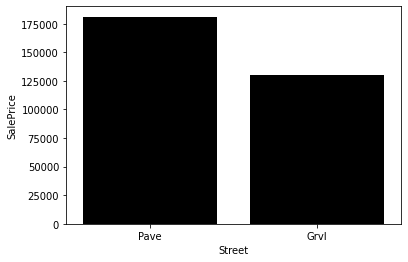

In [30]:
sns.barplot(x='Street',y='SalePrice',color='black',ci=None, data=train_df)
plt.show()

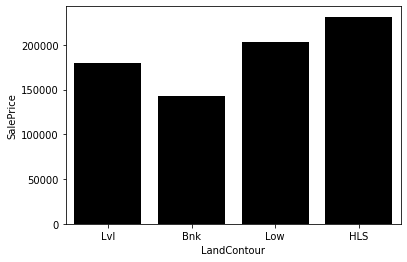

In [31]:
sns.barplot(x='LandContour',y='SalePrice',color='black',ci=None, data=train_df)
plt.show()

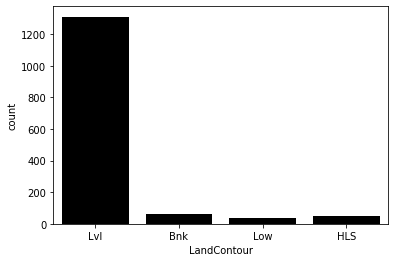

In [32]:
sns.countplot(x='LandContour',color='black',data=train_df)
plt.show()

In [33]:
train_df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

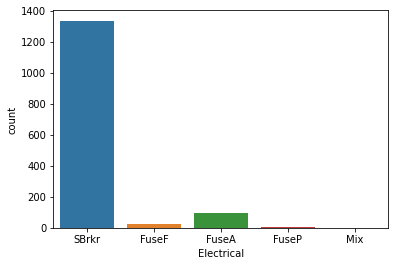

In [34]:
sns.countplot(x='Electrical', data=train_df)
plt.show()

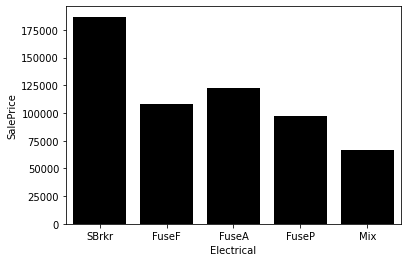

In [35]:
sns.barplot(x='Electrical',y='SalePrice',color='black',ci=None ,data=train_df)
plt.show()

The relationship between the Garage type and the sales price

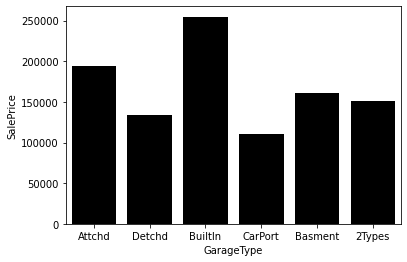

In [36]:
sns.barplot(x='GarageType',y='SalePrice',color='black',ci =None, data=train_df)
plt.show()

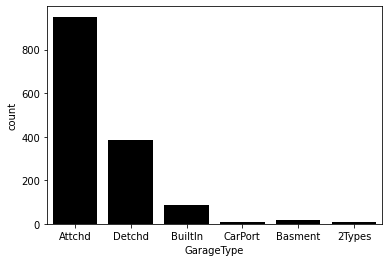

In [37]:
#Number of Garage
sns.countplot(x='GarageType',color='black',data=train_df)
plt.show()

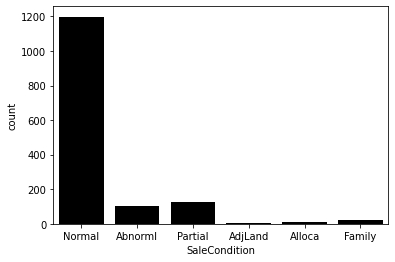

In [38]:
#Sales condition
sns.countplot(x='SaleCondition',color='black', data=train_df)
plt.show()

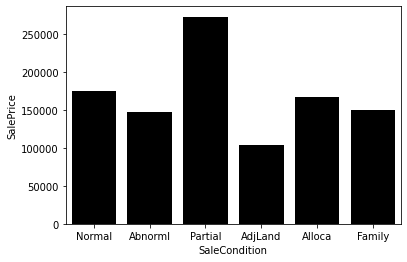

In [39]:
sns.barplot(x='SaleCondition',y='SalePrice',ci=None,color='black' ,data=train_df)
plt.show()

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

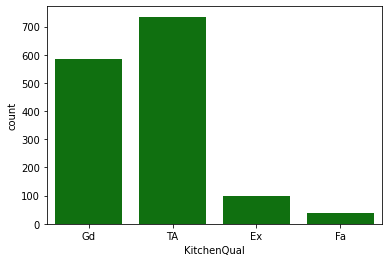

In [40]:
#KitchenQual
sns.countplot(x='KitchenQual',color='Green',data=train_df)

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

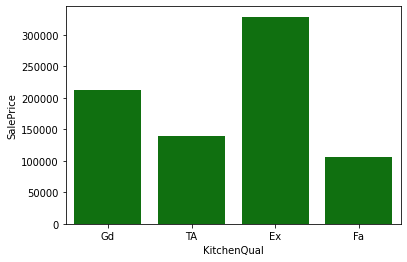

In [41]:
#Check the relation between the kitchen quality and the salesprice
sns.barplot(x='KitchenQual',y='SalePrice',color='Green',ci=None,data=train_df)

The condition affects the price.

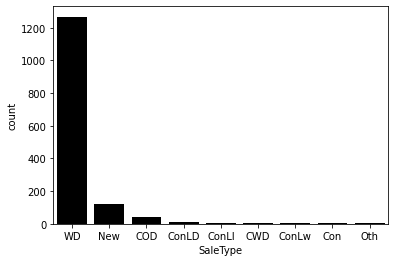

In [42]:
#Sale type
sns.countplot(x='SaleType',color='black',data=train_df)
plt.show()

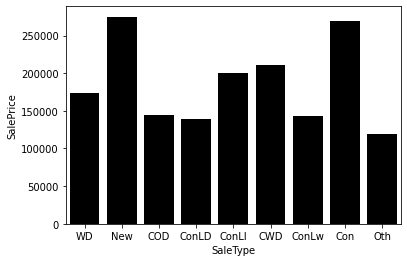

In [43]:
#Relationship between the saletype and the price
sns.barplot(x='SaleType',y='SalePrice',ci=None,color='black',data=train_df)
plt.show()

**Houses just constructed and sold and house on 15% downpayment have the highest salesprice range.**

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

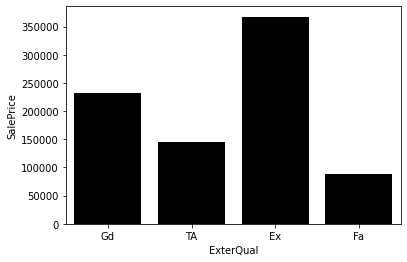

In [44]:
#Type of roof
sns.barplot(x='ExterQual',y="SalePrice",ci=None,data=train_df,color='black')

Exterior quality affects the salesprice in an excellent way

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

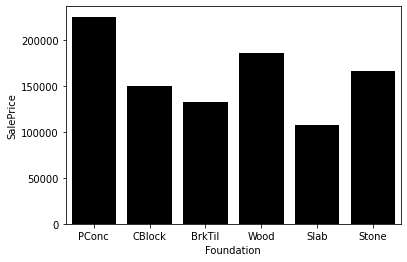

In [45]:
sns.barplot(x='Foundation',y="SalePrice",ci=None,data=train_df,color='black')

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

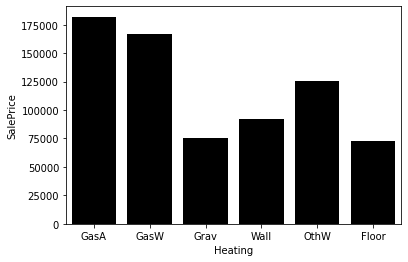

In [46]:
#Type of heating
sns.barplot(x='Heating',y="SalePrice",ci=None,data=train_df,color='black')

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

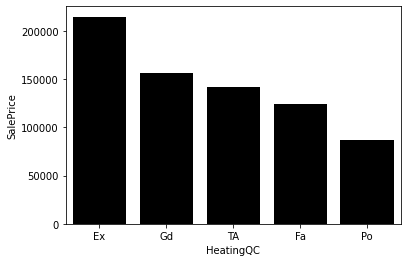

In [47]:
#Heating Quality
sns.barplot(x='HeatingQC',y="SalePrice",ci=None,data=train_df,color='black')

Heating condition affects the sales price. Houses with excellent heating quality and condition have the highest sales price

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

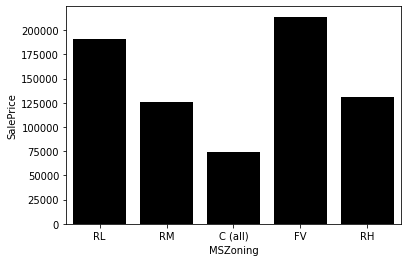

In [48]:
#Heating Quality
sns.barplot(x='MSZoning',y="SalePrice",ci=None,data=train_df,color='black')

Floating village residential houses had the highest sales prices followed by residential low density zones.

## Model Development

In [49]:
train_df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

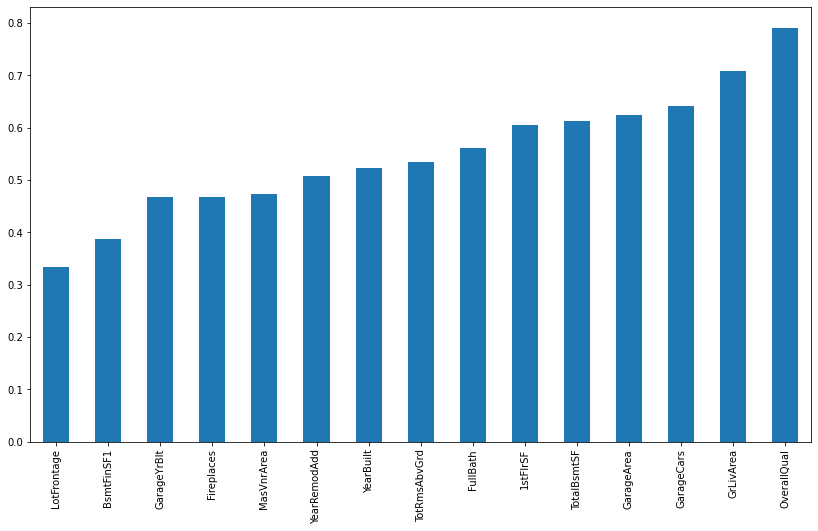

In [50]:
plt.figure(figsize=(14,8))
train_df.corr()['SalePrice'].sort_values()[22:-1].plot(kind='bar')
plt.show()

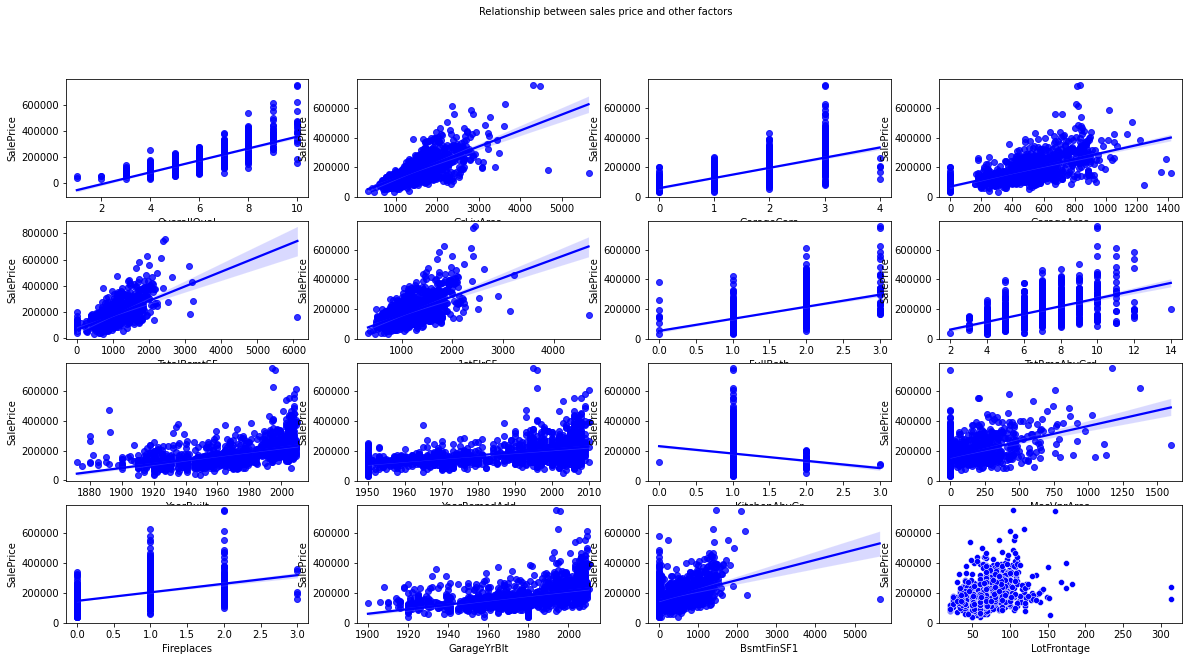

In [51]:
fig, axes = plt.subplots(4,4,figsize = (20,10))
fig.suptitle('Relationship between sales price and other factors',fontsize = 10)
sns.regplot(x=train_df['OverallQual'], y=train_df['SalePrice'],color='b',ax=axes[0][0])
sns.regplot(x=train_df['GrLivArea'], y=train_df['SalePrice'],color='b',ax=axes[0][1])
sns.regplot(x=train_df['GarageCars'], y=train_df['SalePrice'],color='b',ax=axes[0][2])
sns.regplot(x=train_df['GarageArea'], y=train_df['SalePrice'],color='b',ax=axes[0][3])
sns.regplot(x=train_df['TotalBsmtSF'], y=train_df['SalePrice'],color='b',ax=axes[1][0])
sns.regplot(x=train_df['1stFlrSF'], y=train_df['SalePrice'],color='b',ax=axes[1][1])
sns.regplot(x=train_df['FullBath'], y=train_df['SalePrice'],color='b',ax=axes[1][2])
sns.regplot(x=train_df['TotRmsAbvGrd'], y=train_df['SalePrice'],color='b',ax=axes[1][3])
sns.regplot(x=train_df['YearBuilt'], y=train_df['SalePrice'],color='b',ax=axes[2][0])
sns.regplot(x=train_df['YearRemodAdd'], y=train_df['SalePrice'],color='b',ax=axes[2][1])
sns.regplot(x=train_df['KitchenAbvGr'], y=train_df['SalePrice'],color='b',ax=axes[2][2])
sns.regplot(x=train_df['MasVnrArea'], y=train_df['SalePrice'],color='b',ax=axes[2][3])
sns.regplot(x=train_df['Fireplaces'], y=train_df['SalePrice'],color='b',ax=axes[3][0])
sns.regplot(x=train_df['GarageYrBlt'], y=train_df['SalePrice'],color='b',ax=axes[3][1])
sns.regplot(x=train_df['BsmtFinSF1'], y=train_df['SalePrice'],color='b',ax=axes[3][2])
sns.scatterplot(x=train_df['LotFrontage'], y=train_df['SalePrice'],color='b',ax=axes[3][3])
sns.set_style("whitegrid")

In [52]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [53]:
#Encode non-numeric features
features =['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces']
y= train_df['SalePrice']
X =train_df[features]

### Encode the non-numeric features

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

In [55]:
testX  =test_df[features]

#dftestX =pd.get_dummies(test_df[non_numeric])
#testX = pd.concat([testX,dftestX])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
steps =[('scaler', StandardScaler()),
       ('GB',GradientBoostingRegressor(n_estimators =300,max_depth=3,min_samples_split=2))]
pipeline = Pipeline(steps)
lr = pipeline.fit(X_train,y_train)
y_predict =lr.predict(X_test)
RMSE =MSE(y_test,y_predict)**(1/2)
print(RMSE)                  

30118.473322507067


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
steps =[('scaler', StandardScaler()),
       ('lm',LinearRegression())]
pipeline = Pipeline(steps)
lr = pipeline.fit(X_train,y_train)
y_predict =lr.predict(X_test)
RMSE =MSE(y_test,y_predict)**(1/2)
print(RMSE)                  

35894.58236836752


In [58]:
import xgboost as xg

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
steps =[('scaler', StandardScaler()),
       ('XB',xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 300, seed = 123))]
pipeline = Pipeline(steps)
XB = pipeline.fit(X_train,y_train)
y_predict =XB.predict(X_test)
RMSE =MSE(y_test,y_predict)**(1/2)
print(RMSE)  

28718.81851552537


In [60]:
#the XBoost had the least mean squared error
prediction =XB.predict(testX)

In [61]:
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': prediction})
output.head()

,Id,SalePrice
0,1461,123793.007812
1,1462,155467.343750
2,1463,183541.671875
3,1464,180967.531250
4,1465,201426.484375


In [62]:
output.to_csv('submission.csv', index=False)